# Classification Problem using FNN

In this exercise I will be building a neural network classification model. I will use a simple FNN architecture and focus on using important tools in the development of these types of models. Let's get to it!

In [1]:
# Packages to import we will be needing to solve this exercise

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Set display options

np.set_printoptions(threshold=10)

In [3]:
# Generate the make_moons dataset
# Let's generate the dataset we will be using during this exercise
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

In [4]:
X

array([[-0.11166654,  0.52022374],
       [ 1.14264982, -0.34257734],
       [ 0.79555796, -0.01144231],
       ...,
       [ 1.72760808, -0.42882943],
       [-1.01448644,  0.13522904],
       [ 0.77438101,  0.63428493]])

In [5]:
y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

The dataset comes as numpy arrays nevertheless, we can't begin to build our model just yet. First we will be preprocessing our data using Standard Scaler, splitting the data into train and test, and converting the data to pytorch tensors.

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now we are ready, let's build the model!

In [7]:
# Neural network architecture
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Hidden layer with 10 neurons
    Dense(1, activation='sigmoid')                   # Output layer with 1 neuron for binary classification
])

C:\Users\AJ\antonio_janeiro_venv\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)
# Print training progress every 100 epochs
for i in range(0, 1000, 100):
    print(f'Epoch {i+100}, Loss: {history.history["loss"][i]:.4f}, Accuracy: {history.history["accuracy"][i]:.4f}')

Epoch 100, Loss: 0.0581, Accuracy: 0.9737
Epoch 200, Loss: 0.0568, Accuracy: 0.9762
Epoch 300, Loss: 0.0592, Accuracy: 0.9737
Epoch 400, Loss: 0.0581, Accuracy: 0.9750
Epoch 500, Loss: 0.0585, Accuracy: 0.9725
Epoch 600, Loss: 0.0606, Accuracy: 0.9737
Epoch 700, Loss: 0.0575, Accuracy: 0.9737
Epoch 800, Loss: 0.0582, Accuracy: 0.9737
Epoch 900, Loss: 0.0597, Accuracy: 0.9750
Epoch 1000, Loss: 0.0600, Accuracy: 0.9700


Time to evaluate the model we have trained

In [14]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9800


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


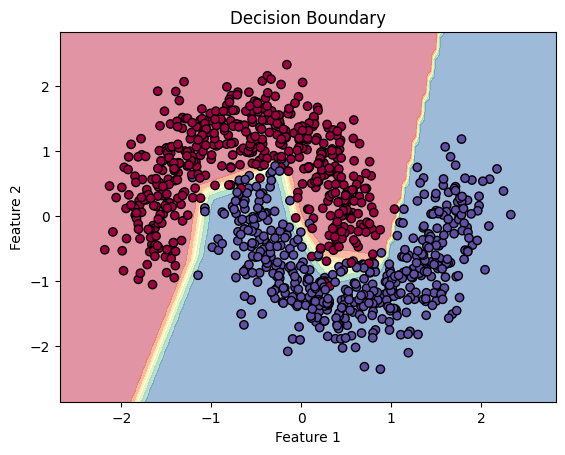

In [15]:
# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    # Define the grid of points
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict for each point on the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid_points)
    predictions = predictions.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, predictions, alpha=0.5, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(model, X, y)

The results are great! Obviously, this is not a complex exercise at all nonetheless, it is great to touch the tools used on neural networks classification problems.